In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nishadchaoji","key":"639f9916f296f413ed68b95b595ea1b7"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud


 86% 57.0M/66.0M [00:02<00:00, 29.4MB/s]
100% 66.0M/66.0M [00:02<00:00, 26.5MB/s]


In [ ]:
!unzip creditcardfraud.zip



Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd 

In [ ]:
DF = pd.read_csv("creditcard.csv")
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
DF.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
DF['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Splitting the dataframe into X and Y
X = DF.iloc[:, DF.columns != 'Class']
y = DF.iloc[:, DF.columns == 'Class']


In [ ]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 63 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.3-py2.py3-none-any.whl size=177103819 sha256=14dadb411fb4ca661bbec13d45e017bcfd71c0dfeb52a2673394cdc904f213df
  Stored in directory: /root/.cache/pip/wheels/64/86/0f/d54be71f64b85d238edb037069bc866f2156cc563bf02be527
Successfully built h2o


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Working with imbalanced data
from imblearn.over_sampling import SMOTE, ADASYN

# Processing data
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler as ss

from sklearn.ensemble import ExtraTreesClassifier


# Model building
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

# for ROC graphs & metrics, import scikitplot as skplt
#import scikitplot as skplt
#import sklearn metrics to determine model characteristcs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score


In [ ]:
pd.options.display.max_columns = 300

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


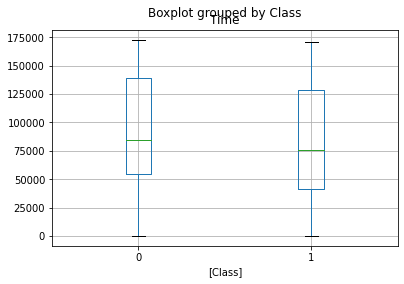

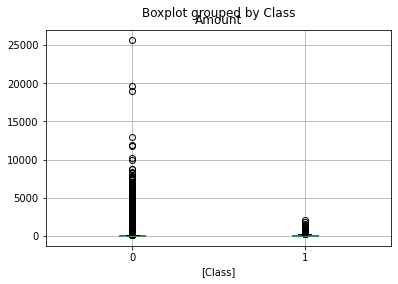

In [ ]:
# boxplot for Time and Amount vs Class:
DF.boxplot(column = ['Time'], by = ['Class'])
DF.boxplot(column = ['Amount'], by = ['Class'])

In [ ]:
# Scale all numerical features in X  using sklearn's StandardScaler class
scale = ss()
X_trans = scale.fit_transform(X)
X_trans.shape

(284807, 30)

In [ ]:

X_train, X_test, y_train, y_test =   train_test_split(X_trans,
                                                      y,
                                                      test_size = 0.3,
                                                      stratify = y
                                                      )



In [ ]:
#Balancing the Data using ADASYN and use H2O Deeplearning estimator
ad = ADASYN()
X_res1, y_res1 = ad.fit_resample(X_train, y_train)

type(X_res1)
X_train, X_test, y_train, y_test =   train_test_split(X_res1,
                                                      y_res1,
                                                      test_size = 0.3,
                                                      stratify = y_res1
                                                      )

In [ ]:
# Checking if the data is balanced after ADASYN
X_res1.shape                   
np.sum(y_res1)/len(y_res1)      
np.unique(y_res1, return_counts = True)

(array([0, 1]), array([199020, 199001]))

In [ ]:
X_res1.shape

(398021, 30)

In [ ]:
y_res1.shape

(398021, 1)

In [ ]:
y_res1 = y_res1.values.reshape(y_res1.size, 1)
y_res1.shape

(398021, 1)

In [ ]:
X = np.hstack((X_res1,y_res1))
X.shape

(398021, 31)

In [ ]:
# Start h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 24 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_7ykzo2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.992 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Transform X to h2o dataframe
df = h2o.H2OFrame(X)
len(df.columns) 
df.shape

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


(398021, 31)

In [ ]:
df.columns


['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30',
 'C31']

In [ ]:
# Get list of predictor column names and target column names
X_columns = df.columns[0:30]   
X_columns 

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30']

In [ ]:
y_columns = df.columns[30]
y_columns

'C31'

In [ ]:
# Make Target column as factor, as required by h20
df['C31'] = df['C31'].asfactor()

In [ ]:
# Build a deeplearning model on balanced data using H2o Estimator

dl_model = H2ODeepLearningEstimator(epochs=1000,
                                    distribution = 'bernoulli', 
                                    missing_values_handling = "MeanImputation",
                                    variable_importances=True,
                                    nfolds = 2,
                                    fold_assignment = "Stratified",
                                    keep_cross_validation_predictions = True,
                                    balance_classes=False,
                                    standardize = True, 
                                    activation = 'RectifierWithDropout',
                                    hidden = [100,100], 
                                    stopping_metric = 'logloss',
                                    loss = 'CrossEntropy')

In [ ]:
# For measuring time elapsed
from time import time
# Train our model
start = time()
dl_model.train(X_columns,
               y_columns,
               training_frame = df)

end = time()
(end - start)/3600

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


39.155226373672484

In [ ]:
# Get model summary
type(dl_model)
print(dl_model)
dl_model.cross_validation_holdout_predictions()
dl_model.varimp()

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1657893532580_449


Status of Neuron Layers: predicting C31, 2-class classification, bernoulli distribution, CrossEntropy loss, 13,402 weights/biases, 166.7 KB, 52,231,158 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0.0,,,,,,,,,
1,,2,100,RectifierDropout,50.0,0.0,0.0,0.277233,0.39339,0.0,0.030537,0.601221,-0.703777,0.697125
2,,3,100,RectifierDropout,50.0,0.0,0.0,0.473183,0.464356,0.0,-0.090217,0.465551,-0.040502,1.134265
3,,4,2,Softmax,,0.0,0.0,0.215877,0.399388,0.0,-0.08809,3.245976,22.082727,1.743252




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.00029071416905164087
RMSE: 0.017050342197493892
LogLoss: 0.0036774895622737895
Mean Per-Class Error: 0.00019774569903104609
AUC: 0.9998481069531275
AUCPR: 0.9996513618556183
Gini: 0.9996962139062551

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9997547186325964: 


,,0,1,Error,Rate
0,0,5055.0,2.0,0.0004,(2.0/5057.0)
1,1,0.0,5035.0,0.0,(0.0/5035.0)
2,Total,5055.0,5037.0,0.0002,(2.0/10092.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.997547e-01,0.999801,393.0
1,max f2,9.997547e-01,0.999921,393.0
2,max f0point5,9.997547e-01,0.999682,393.0
3,max accuracy,9.997547e-01,0.999802,393.0
4,max precision,9.999066e-01,0.999801,373.0
5,max recall,9.997547e-01,1.000000,393.0
6,max specificity,1.000000e+00,0.999802,0.0
7,max absolute_mcc,9.997547e-01,0.999604,393.0
8,max min_per_class_accuracy,9.998210e-01,0.999605,392.0
9,max mean_per_class_accuracy,9.997547e-01,0.999802,393.0



Gains/Lift Table: Avg response rate: 49.89 %, avg score: 49.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.029925,1.000000e+00,2.004369,2.004369,1.000000,1.000000e+00,1.000000,1.000000,0.059980,0.059980,100.436941,100.436941,0.059980
1,2,0.033789,1.000000e+00,2.004369,2.004369,1.000000,1.000000e+00,1.000000,1.000000,0.007746,0.067726,100.436941,100.436941,0.067726
2,3,0.040824,1.000000e+00,2.004369,2.004369,1.000000,1.000000e+00,1.000000,1.000000,0.014101,0.081827,100.436941,100.436941,0.081827
3,4,0.050040,1.000000e+00,2.004369,2.004369,1.000000,1.000000e+00,1.000000,1.000000,0.018471,0.100298,100.436941,100.436941,0.100298
4,5,0.100079,1.000000e+00,2.004369,2.004369,1.000000,1.000000e+00,1.000000,1.000000,0.100298,0.200596,100.436941,100.436941,0.200596
5,6,0.150020,1.000000e+00,2.000392,2.003046,0.998016,1.000000e+00,0.999339,1.000000,0.099901,0.300497,100.039249,100.304552,0.300299
6,7,0.200059,1.000000e+00,2.004369,2.003377,1.000000,1.000000e+00,0.999505,1.000000,0.100298,0.400794,100.436941,100.337666,0.400597
7,8,0.300040,9.999998e-01,2.004369,2.003707,1.000000,9.999999e-01,0.999670,1.000000,0.200397,0.601192,100.436941,100.370747,0.600994
8,9,0.400020,9.999985e-01,2.004369,2.003873,1.000000,9.999994e-01,0.999752,1.000000,0.200397,0.801589,100.436941,100.387291,0.801391
9,10,0.500000,2.815729e-11,1.984505,2.000000,0.990089,9.920694e-01,0.997820,0.998414,0.198411,1.000000,98.450450,100.000000,0.997825




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.00036861534104013426
RMSE: 0.019199357828847668
LogLoss: 0.005753125992453461
Mean Per-Class Error: 0.00034167588267096285
AUC: 0.9997523059422343
AUCPR: 0.9995180501445889
Gini: 0.9995046118844686

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7938009276685437: 


,,0,1,Error,Rate
0,0,198891.0,129.0,0.0006,(129.0/199020.0)
1,1,7.0,198994.0,0.0,(7.0/199001.0)
2,Total,198898.0,199123.0,0.0003,(136.0/398021.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,7.938009e-01,0.999658,300.0
1,max f2,7.938009e-01,0.999842,300.0
2,max f0point5,8.367159e-01,0.999482,284.0
3,max accuracy,7.938009e-01,0.999658,300.0
4,max precision,9.999561e-01,0.999555,4.0
5,max recall,6.520727e-08,1.000000,399.0
6,max specificity,9.999993e-01,0.999683,0.0
7,max absolute_mcc,7.938009e-01,0.999317,300.0
8,max min_per_class_accuracy,8.912800e-01,0.999417,250.0
9,max mean_per_class_accuracy,7.938009e-01,0.999658,300.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.163836,1.000000,1.998746,1.998746,0.999325,1.000000,0.999325,1.000000,0.327466,0.327466,99.874593,99.874593,0.327245
1,2,0.201582,1.000000,1.999297,1.998849,0.999601,1.000000,0.999377,1.000000,0.075467,0.402933,99.929672,99.884906,0.402681
2,3,0.300153,0.999997,1.999535,1.999074,0.999720,0.999999,0.999489,1.000000,0.197094,0.600027,99.953470,99.907423,0.599721
3,4,0.400004,0.999957,1.999592,1.999204,0.999748,0.999986,0.999554,0.999996,0.199662,0.799689,99.959222,99.920353,0.799333
4,5,0.500001,0.884179,1.997784,1.998920,0.998844,0.997522,0.999412,0.999501,0.199773,0.999462,99.778387,99.891961,0.998874
5,6,1.000000,0.000000,0.001075,1.000000,0.000538,0.000606,0.499976,0.500055,0.000538,1.000000,-99.892463,0.000000,0.000000




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid
0,accuracy,0.999663,0.000156,0.999774,0.999553
1,auc,0.999746,0.000153,0.999855,0.999638
2,err,0.000337,0.000156,0.000226,0.000447
3,err_count,67.000000,31.112698,45.000000,89.000000
4,f0point5,0.999486,0.000276,0.999680,0.999291
5,f1,0.999663,0.000156,0.999774,0.999553
6,f2,0.999841,0.000037,0.999867,0.999815
7,lift_top_group,1.998406,0.000187,1.998538,1.998274
8,logloss,0.005754,0.003068,0.003584,0.007923
9,max_per_class_error,0.000633,0.000355,0.000382,0.000885



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-07-15 15:44:42,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-07-15 15:44:44,20 min 40.999 sec,25852 obs/sec,0.115549,1,45991.0,0.330670,0.411888,0.562627,0.958022,0.959926,2.004369,0.112862
2,,2022-07-15 15:44:49,20 min 46.174 sec,26973 obs/sec,0.462312,4,184010.0,0.258779,0.241984,0.732131,0.987600,0.985605,2.004369,0.052913
3,,2022-07-15 15:44:55,20 min 51.540 sec,30649 obs/sec,0.927745,8,369262.0,0.173330,0.109752,0.879826,0.995745,0.994535,2.004369,0.027348
4,,2022-07-15 15:45:01,20 min 57.541 sec,33472 obs/sec,1.506704,13,599700.0,0.104084,0.047236,0.956666,0.998286,0.997324,2.000369,0.009711
5,,2022-07-15 15:45:06,21 min 3.178 sec,35502 obs/sec,2.086928,18,830641.0,0.069934,0.028534,0.980437,0.998877,0.998017,1.999197,0.005054
6,,2022-07-15 15:45:12,21 min 8.599 sec,37038 obs/sec,2.667746,23,1061819.0,0.054194,0.021646,0.988252,0.999150,0.998380,2.000357,0.003270
7,,2022-07-15 15:45:18,21 min 14.737 sec,37299 obs/sec,3.247384,28,1292527.0,0.045377,0.017820,0.991764,0.999263,0.998424,2.000291,0.001982
8,,2022-07-15 15:45:23,21 min 19.975 sec,38337 obs/sec,3.827652,33,1523486.0,0.039985,0.015901,0.993605,0.999360,0.998687,2.000626,0.001387
9,,2022-07-15 15:45:28,21 min 25.201 sec,39167 obs/sec,4.408190,38,1754552.0,0.039903,0.015603,0.993631,0.999348,0.998564,2.000664,0.001784



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.060467
1,C4,0.974098,0.974098,0.058901
2,C9,0.946003,0.946003,0.057202
3,C22,0.846259,0.846259,0.051171
4,C5,0.771545,0.771545,0.046653
5,C13,0.717385,0.717385,0.043378
6,C18,0.700333,0.700333,0.042347
7,C15,0.682671,0.682671,0.041279
8,C11,0.642613,0.642613,0.038857
9,C8,0.611161,0.611161,0.036955



See the whole table with table.as_data_frame()



[('C2', 1.0, 1.0, 0.0604670758551034),
 ('C4', 0.9740979075431824, 0.9740979075431824, 0.05890085206571111),
 ('C9', 0.9460033774375916, 0.9460033774375916, 0.05720205798270286),
 ('C22', 0.8462589979171753, 0.8462589979171753, 0.051170807020121625),
 ('C5', 0.7715449929237366, 0.7715449929237366, 0.04665306961274479),
 ('C13', 0.717385470867157, 0.717385470867157, 0.04337820168427345),
 ('C18', 0.7003328800201416, 0.7003328800201416, 0.04234708138000093),
 ('C15', 0.6826709508895874, 0.6826709508895874, 0.04127911617151625),
 ('C11', 0.6426130533218384, 0.6426130533218384, 0.03885693224069121),
 ('C8', 0.6111611723899841, 0.6111611723899841, 0.0369551289705991),
 ('C3', 0.6070716977119446, 0.6070716977119446, 0.036707850395034554),
 ('C17', 0.5865448713302612, 0.5865448713302612, 0.035466653227148766),
 ('C7', 0.5830602645874023, 0.5830602645874023, 0.03525594924690312),
 ('C19', 0.5654393434524536, 0.5654393434524536, 0.03419046367199938),
 ('C24', 0.5215747952461243, 0.5215747952461

In [ ]:
#### Making predictions on X_test ######
# Checking the class distibution in unbalanced test data
np.unique(
         y_test,
         return_counts = True) 

# Check the shapes of X_test and y_test

# Check the shape of X_test
X_test.shape

(119407, 30)

In [ ]:
# Check the shape of y_test

y_test.shape

(119407, 1)

In [ ]:
# y_test is 1-D array, so need to reshape into 2-D array
# to be able to stack alongside X_test
y_test = y_test.values.ravel()
y_test = y_test.reshape(len(y_test), 1)
y_test.shape

(119407, 1)

In [ ]:
# Horizontally stack X-test and y_test
X_test = np.hstack((X_test,y_test)) 
X_test.shape

(119407, 31)

In [ ]:
# Transform X_test to h2o dataframe
X_test = h2o.H2OFrame(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# convert into a factor, as required by H2O
X_test['C31'] = X_test['C31'].asfactor()

In [ ]:
# Make prediction on X_test
result = dl_model.predict(X_test[: , 0:30])
result.shape

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


(119407, 3)

In [ ]:
result.as_data_frame().head()

,predict,p0,p1
0,1,1.549855e-08,1.000000e+00
1,1,6.680133e-07,9.999993e-01
2,1,4.824268e-09,1.000000e+00
3,0,1.000000e+00,2.911745e-183
4,1,8.283057e-08,9.999999e-01


In [ ]:
# Convert H2O frame back to pandas dataframe
xe = X_test['C31'].as_data_frame()
xe['result'] = result[0].as_data_frame()
xe.head()
xe.shape

(119407, 2)

In [ ]:
xe.columns

Index(['C31', 'result'], dtype='object')

In [ ]:
# So actual target vs predicted
out = (xe['result'] == xe['C31'])
np.sum(out)/out.size

0.9998995033791989

In [ ]:
# Create confusion matrix
 
conf_matrix = confusion_matrix(xe['C31'], xe['result']).ravel()
    

plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - h2o-deeplearning") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
print("\n")
plt.show()
print("\n")

,Predicted Fraud,Predicted Not Fraud
Fraud,59696,5
Not Fraud,7,59699


In [ ]:
precision = tp/(tp+fp)
precision 
recall = tp/(tp + fn)
recall  
f"Precision: {precision}, Recall: {recall}"

'Precision: 0.9998827529604878, Recall: 0.9999162493090568'

In [ ]:
# Calculate the fpr and tpr for
# all thresholds of the classification

pred_probability = result["p1"].as_data_frame()

In [ ]:
# Get fpr, tpr for various thresholds
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(xe['C31'],
                                        pred_probability,
                                        pos_label = 1
                                        )

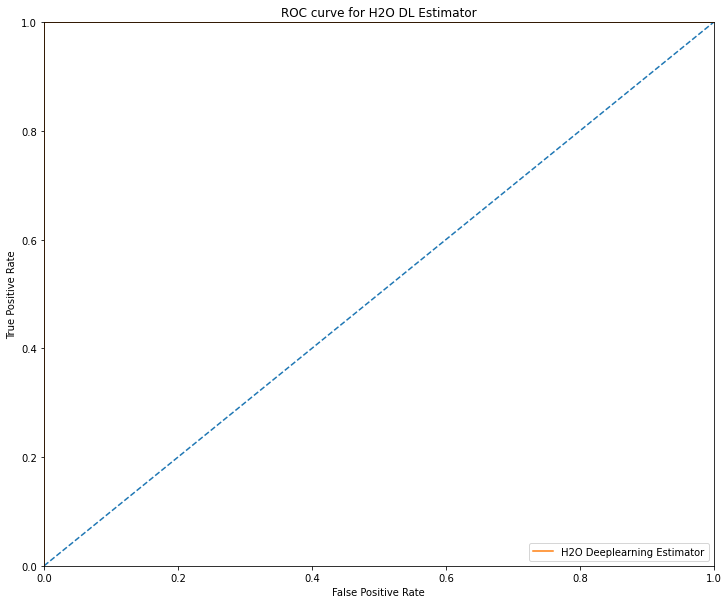

In [ ]:
# Plotting Graph
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)
# connecting diagonals
ax1.plot([0, 1], [0, 1], ls="--")
# Creating Labels for Graph
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC curve for H2O DL Estimator')
# Setting graph limits
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])

ax1.plot(fpr, tpr, label = 'H2O Deeplearning Estimator')
ax1.legend(loc="lower right")
plt.show()

In [ ]:
# This is the AUC
auc = np.trapz(tpr,fpr)
auc

0.9999084659064857

In [ ]:
#  feature importance
var_df = pd.DataFrame(dl_model.varimp(),
             columns=["Variable", "Relative Importance", "Scaled Importance", "Percentage"])
var_df.head(10)

,Variable,Relative Importance,Scaled Importance,Percentage
0,C2,1.000000,1.000000,0.060467
1,C4,0.974098,0.974098,0.058901
2,C9,0.946003,0.946003,0.057202
3,C22,0.846259,0.846259,0.051171
4,C5,0.771545,0.771545,0.046653
5,C13,0.717385,0.717385,0.043378
6,C18,0.700333,0.700333,0.042347
7,C15,0.682671,0.682671,0.041279
8,C11,0.642613,0.642613,0.038857
9,C8,0.611161,0.611161,0.036955


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X_res1, y_res1, random_state=42, test_size=0.3, shuffle=True)

In [ ]:
# Training the algorithm
lr_model.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

In [ ]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
tnlr, fplr, fnlr, tplr = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tplr, fplr],
        'Predicted Not Fraud': [fnlr, tnlr]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,51951,7745
Not Fraud,5870,53841


In [ ]:
# Print classification report
print(classification_report(y_test, ,lr_pred_test
                            target_names=["Non Fraudulent", "Fraudulent"]))